In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import ppscore as pps
import seaborn as sns



import ipyvolume as ipv

from ipywidgets import ColorPicker, VBox, \
    interact, interactive, fixed


from IPython.display import Image  


from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
from matplotlib import colors as mcolors 
import math 
from sklearn.decomposition import PCA


import sklearn
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.tree import export_graphviz




In [205]:
# WSTĘPNY WGLĄD W DANE

stud_perf = pd.read_csv('StudentsPerformance.csv')
stud_perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [206]:
stud_perf.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [207]:
# MACIERZ PPS (PREDICTIVE POWER SCORE) DLA DANYCH
pps.matrix(stud_perf)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,0.236476,0.204639,0.000004,0.000004,0.273044,0.324717,0.361460
race/ethnicity,0.000003,1.000000,0.059348,0.000003,0.000003,0.127434,0.102153,0.098740
parental level of education,0.038600,0.133698,1.000000,0.036969,0.024754,0.151753,0.115297,0.142498
lunch,0.000003,0.000003,0.000003,1.000000,0.000003,0.277689,0.187065,0.173602
test preparation course,0.000004,0.000004,0.000004,0.000004,1.000000,0.128302,0.216006,0.279949
math score,0.007253,0.023081,0.000000,0.048682,0.009130,1.000000,0.387513,0.356092
reading score,0.029623,0.005802,0.010871,0.026259,0.035132,0.386200,1.000000,0.689441
writing score,0.046468,0.005271,0.019085,0.027058,0.051162,0.354333,0.684598,1.000000


In [208]:
# PODSTAWOWE STATYSTYKI DLA DANYCH
stud_perf.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


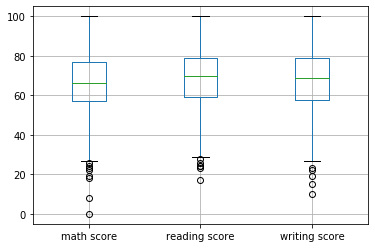

In [209]:
stud_perf.boxplot()

## WAŻNE: Z PONIŻSZEGO BOXPLOTA I MACIERZY KORELACJI WYNIKA, ŻE ZAPEWNE READING SCORE I WRITING SCORE 
## SĄ ZE SOBĄ MOCNO SKORELOWANE, ALE WRITING SCORE MA WIĘCEJ WIDOCZNYCH OUTLIERÓW, WIĘC TO JEGO BĘDZIEMY ANALIZOWAĆ

## PONADTO, MOŻNA ZAOBSERWOWAĆ CLUSTER OUTLIERÓW W MATH SCORE POD POSTACIĄ WYNIKÓW OSCYLUJĄCYCH
## W OKOLOCY 20%, A DWA OUTLIERY WYRÓŻNIAJĄ SIĘ BARDZO MOCNO, NA POZIOMIE 10% I 0% 

In [210]:
## MATHSCORE - ANALIZA OUTLIERÓW
spcopy1 = stud_perf[stud_perf['math score']<=15]
spcopy1

# ŁATWO ZAUWAŻYĆ, IŻ OBIE TE OSOBY NIE PODCHODZIŁY DO TESTU PRZYGOTOWAWCZEGO, JAK I MAJĄ OGRANICZONE POSIŁKI

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
980,female,group B,high school,free/reduced,none,8,24,23


[[None, None, None, None, None, None, None, None, None, None, None, None]]

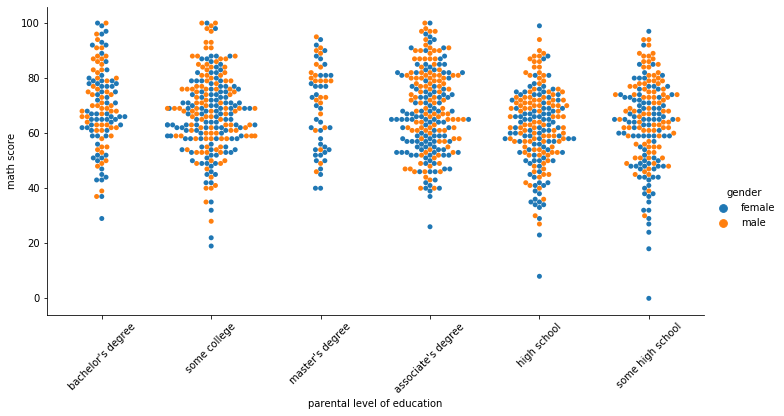

In [211]:
## WYKRES ZALEŻNOŚCI WYKSZTAŁCENIA RODZICÓW OD WYNIKÓW CZĘŚCI MATEMATYCZNEJ, WIDAĆ BRAK KORELACJI
plot1 = sns.catplot(x='parental level of education', y="math score", hue = 'gender', kind
                    = 'swarm', data = stud_perf, aspect = 2)
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in plot1.axes.flat]

[[None, None, None, None, None, None, None, None, None, None, None, None]]

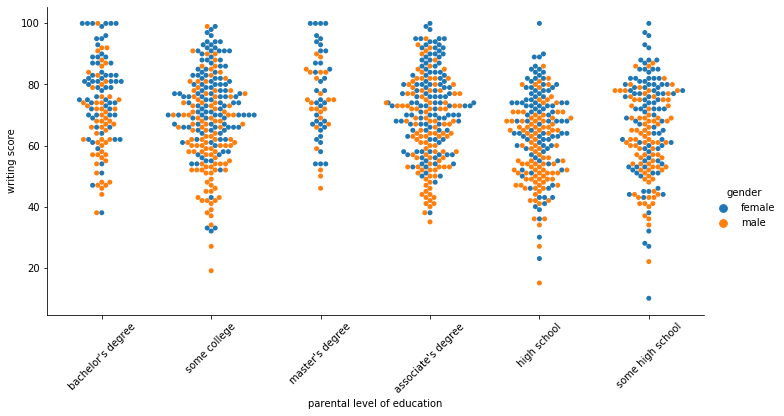

In [212]:
## WYKRES ZALEŻNOŚCI WYKSZTAŁCENIA RODZICÓW OD WYNIKÓW CZĘŚCI PISEMNEJ. MOŻNA ZAUWAŻYĆ, ŻE LEPSZE WYNIKI OSIĄGAJĄ KOBIETY.
## PONADTO W TYM RODZAJU TESTU WIDAĆ ZALEŻNOŚĆ STOPNIA EDUKACJI RODZICÓW OD EGZAMINU (EGZAMIN PISEMNY FILOLOGICZNY)

## JEST TO ŁATWO WYJAŚNIALNE: OSOBY, KTÓRE NIE OTRZYMUJĄ EDUKACJI CZĘSTO MAJĄ SKROMNIEJSZY ZASÓB SŁOWNICTWA,
## PRZEZ CO ICH DZIECKO NIE JEST W STANIE WŁAŚCIWIE FORMOWAĆ WYPOWIEDZI

plot1 = sns.catplot(x='parental level of education', y="writing score", hue = 'gender', kind = 'swarm', data = stud_perf, aspect = 2)
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in plot1.axes.flat]

[[None, None, None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None, None, None]]

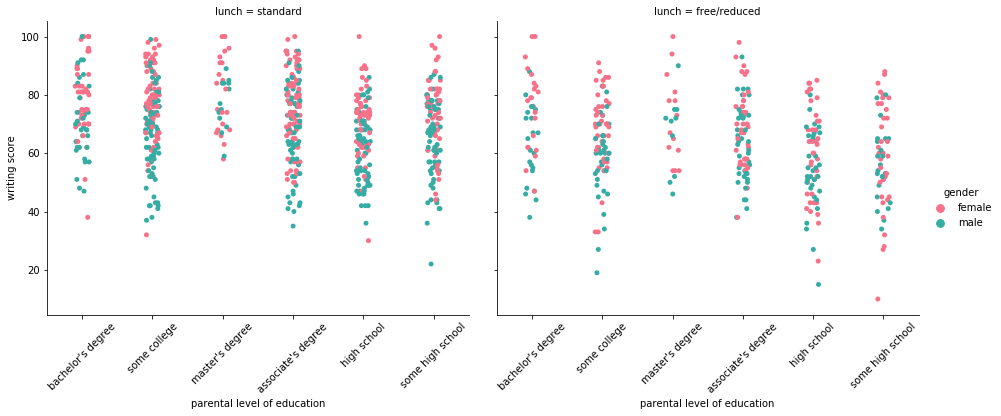

In [213]:
# PONIŻSZE WYKRESY SYGNALIZUJĄ ZALEŻNOŚĆ WYNIKÓW OD JAKOŚCI POSIŁKÓW

plot2 = sns.catplot(x='parental level of education', y="writing score", hue="gender",
                col="lunch", data = stud_perf,
                height=5, aspect=1.3, palette="husl")
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in plot2.axes.flat]

In [214]:
## KOBIETY OSIĄGAJĄ ZNACZNIE WYŻSZE WYNIKI W EGZAMINACH FILOLOGICZNYCH

stud_perf.groupby(by = 'gender').agg(['mean','median'])

math score        reading score        writing score       
             mean median          mean median          mean median
gender                                                            
female  63.633205     65     72.608108     73     72.467181     74
male    68.728216     69     65.473029     66     63.311203     64

In [215]:
# WYRAŹNIE ODSTAJE GRUPA A
stud_perf.groupby(by = 'race/ethnicity').agg(['mean','median'])

math score        reading score        writing score       
                     mean median          mean median          mean median
race/ethnicity                                                            
group A         61.629213   61.0     64.674157     64     62.674157     62
group B         63.452632   63.0     67.352632     67     65.600000     67
group C         64.463950   65.0     69.103448     71     67.827586     68
group D         67.362595   69.0     70.030534     71     70.145038     72
group E         73.821429   74.5     73.028571     74     71.407143     72

In [216]:
# SPODZIEWANY WYNIK - UCZNIOWIE O SŁABSZYM ODŻYWIENIU GORZEJ RADZĄ SOBIE W TESTACH
stud_perf.groupby(by = 'lunch').agg(['mean','median'])

math score        reading score        writing score       
                   mean median          mean median          mean median
lunch                                                                   
free/reduced  58.921127     60     64.653521     65     63.022535     64
standard      70.034109     69     71.654264     72     70.823256     72

# ANALIZA ZA POMOCĄ DRZEW DECYZYJNYCH

In [217]:
## PRZYGOTOWANIE DANYCH

stud_perf.head()
stud_perf['parental level of education'].unique()

stud_perf_ord = stud_perf.copy()
for i in range(len(stud_perf_ord)):
    if(stud_perf_ord['parental level of education'].iloc[i] == "bachelor's degree"):
        stud_perf_ord['parental level of education'].iloc[i] = 2
    elif(stud_perf_ord['parental level of education'].iloc[i] == "some college"):
        stud_perf_ord['parental level of education'].iloc[i] = 4
    elif(stud_perf_ord['parental level of education'].iloc[i] == "master's degree"):
        stud_perf_ord['parental level of education'].iloc[i] = 1
    elif(stud_perf_ord['parental level of education'].iloc[i] == "associate's degree"):
        stud_perf_ord['parental level of education'].iloc[i] = 3
    elif(stud_perf_ord['parental level of education'].iloc[i] == "high school"):
        stud_perf_ord['parental level of education'].iloc[i] = 5
    else:
        stud_perf_ord['parental level of education'].iloc[i] = 6
        
for i in range(len(stud_perf_ord)):
    if(stud_perf_ord.lunch.iloc[i] == 'standard'):
        stud_perf_ord.lunch.iloc[i] = 1
    else:
        stud_perf_ord.lunch.iloc[i] = 0

mark_list = []
for index in stud_perf_ord.index:
    if(stud_perf['math score'].iloc[index] > 50 and stud_perf['writing score'].iloc[index]>50 and stud_perf['writing score'].iloc[index]>50):
        mark_list.append(1)
    else:
        mark_list.append(0)
        
stud_perf['pass']=mark_list

for i in range(len(stud_perf_ord)):
    if(stud_perf_ord['test preparation course'].iloc[i] == 'none'):
        stud_perf_ord['test preparation course'].iloc[i] = 0
    else:
        stud_perf_ord['test preparation course'].iloc[i] = 1
        
mark_list = []
for index in stud_perf.index:
    if(stud_perf['math score'].iloc[index] > 50 and stud_perf['writing score'].iloc[index]>50 and stud_perf['writing score'].iloc[index]>50):
        mark_list.append(1)
    else:
        mark_list.append(0)
        
stud_perf_ord['pass']=mark_list         

C:\Users\przem\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


## ANNALIZA DLA LUNCH I PARENT EDU

ACCURACY: 0.808


[Text(1395.0, 1195.92, 'X[1] <= -0.332\ngini = 0.317\nsamples = 750\nvalue = [148, 602]'),
 Text(697.5, 978.48, 'X[0] <= 0.366\ngini = 0.45\nsamples = 257\nvalue = [88, 169]'),
 Text(348.75, 761.0400000000001, 'X[0] <= -1.678\ngini = 0.406\nsamples = 159\nvalue = [45, 114]'),
 Text(174.375, 543.6, 'gini = 0.444\nsamples = 18\nvalue = [6, 12]'),
 Text(523.125, 543.6, 'X[0] <= -0.315\ngini = 0.4\nsamples = 141\nvalue = [39, 102]'),
 Text(348.75, 326.15999999999997, 'X[0] <= -0.997\ngini = 0.396\nsamples = 81\nvalue = [22, 59]'),
 Text(174.375, 108.72000000000003, 'gini = 0.408\nsamples = 28\nvalue = [8, 20]'),
 Text(523.125, 108.72000000000003, 'gini = 0.389\nsamples = 53\nvalue = [14, 39]'),
 Text(697.5, 326.15999999999997, 'gini = 0.406\nsamples = 60\nvalue = [17, 43]'),
 Text(1046.25, 761.0400000000001, 'X[0] <= 1.048\ngini = 0.493\nsamples = 98\nvalue = [43, 55]'),
 Text(871.875, 543.6, 'gini = 0.478\nsamples = 48\nvalue = [19, 29]'),
 Text(1220.625, 543.6, 'gini = 0.499\nsamples = 5

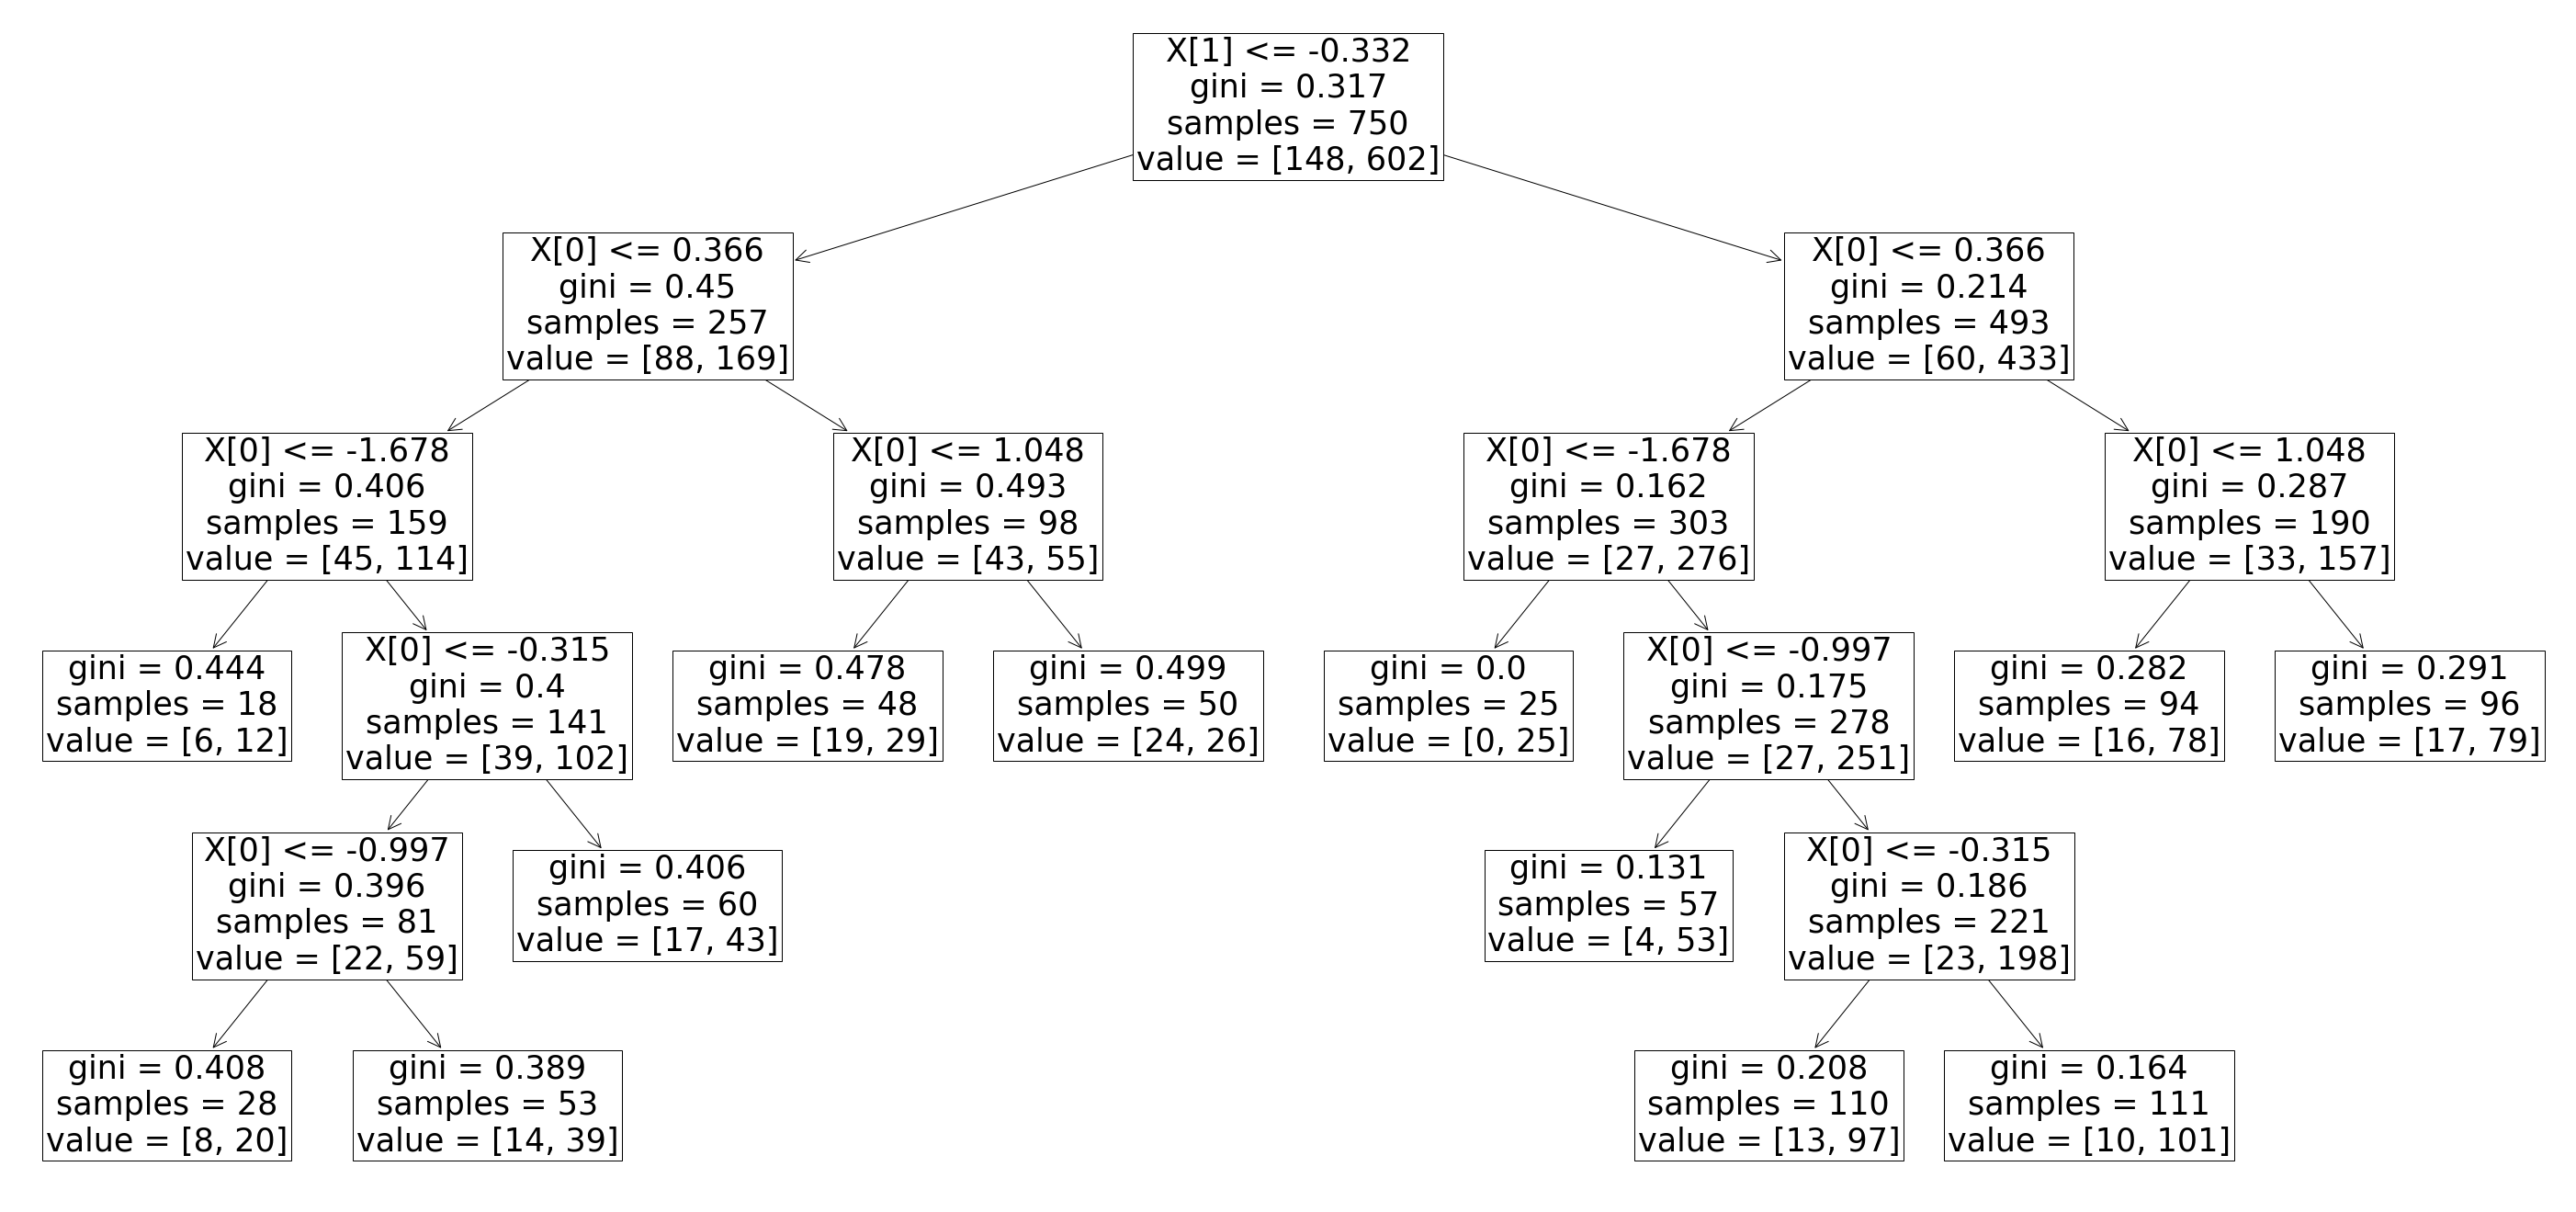

In [218]:
tree_X_pl = stud_perf_ord[['parental level of education', 'lunch']]
tree_Y_pl = stud_perf_ord['pass']

tree_X_pl_train, tree_X_pl_test, tree_Y_pl_train,tree_Y_pl_test =  train_test_split(tree_X_pl,tree_Y_pl,test_size = 0.25, random_state= 0)
sc_X = StandardScaler()
tree_X_pl_train = sc_X.fit_transform(tree_X_pl_train)
tree_X_pl_test = sc_X.transform(tree_X_pl_test)

tree_classifier = DecisionTreeClassifier()
tree_classifier = tree_classifier.fit(tree_X_pl_train,tree_Y_pl_train)

y_pred = tree_classifier.predict(tree_X_pl_test)

from sklearn import metrics
print('ACCURACY:', metrics.accuracy_score(tree_Y_pl_test,y_pred))

from sklearn import tree
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(tree_classifier,fontsize =35)

## ANALIZA DLA PRZYGOTOWANIA I LUNCHU

ACCURACY: 0.808


[Text(1395.0, 1087.2, 'X[1] <= -0.332\ngini = 0.317\nsamples = 750\nvalue = [148, 602]'),
 Text(697.5, 652.32, 'X[0] <= 0.286\ngini = 0.45\nsamples = 257\nvalue = [88, 169]'),
 Text(348.75, 217.44000000000005, 'gini = 0.486\nsamples = 161\nvalue = [67, 94]'),
 Text(1046.25, 217.44000000000005, 'gini = 0.342\nsamples = 96\nvalue = [21, 75]'),
 Text(2092.5, 652.32, 'X[0] <= 0.286\ngini = 0.214\nsamples = 493\nvalue = [60, 433]'),
 Text(1743.75, 217.44000000000005, 'gini = 0.274\nsamples = 317\nvalue = [52, 265]'),
 Text(2441.25, 217.44000000000005, 'gini = 0.087\nsamples = 176\nvalue = [8, 168]')]

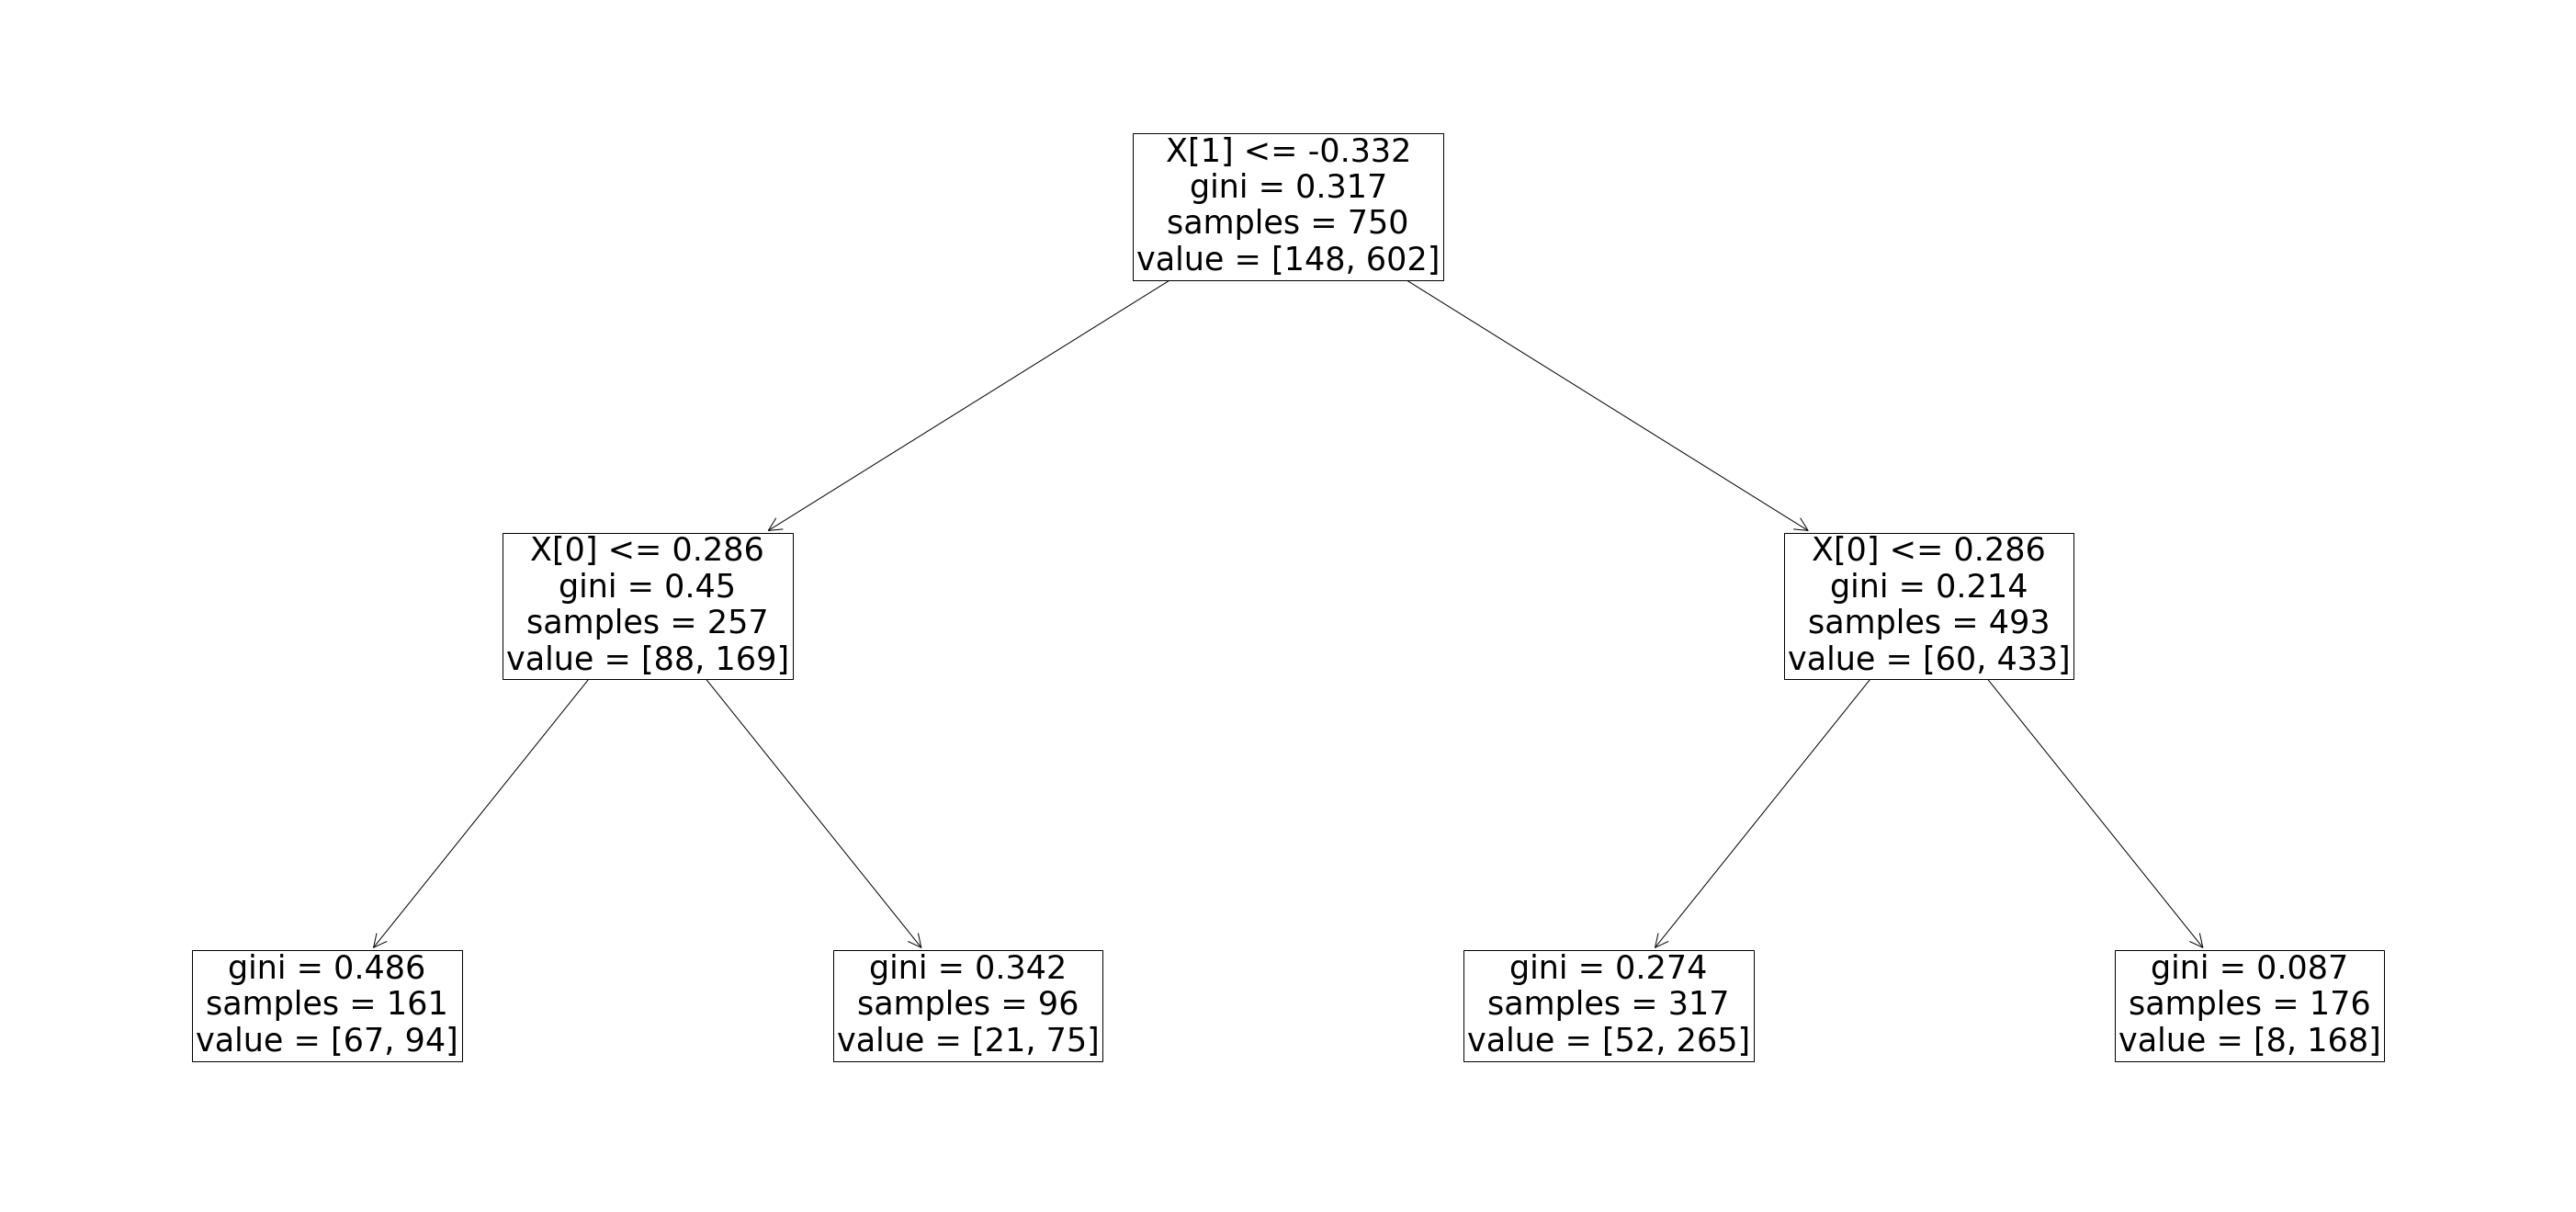

In [219]:
tree_X_tl = stud_perf_ord[['test preparation course', 'lunch']]
tree_Y_tl = stud_perf_ord['pass']

tree_X_tl_train, tree_X_tl_test, tree_Y_tl_train,tree_Y_tl_test =  train_test_split(tree_X_tl,tree_Y_tl,test_size = 0.25, random_state= 0)
sc_X = StandardScaler()
tree_X_tl_train = sc_X.fit_transform(tree_X_tl_train)
tree_X_tl_test = sc_X.transform(tree_X_tl_test)

tree_classifier = DecisionTreeClassifier()
tree_classifier = tree_classifier.fit(tree_X_tl_train,tree_Y_tl_train)

y_pred = tree_classifier.predict(tree_X_tl_test)

from sklearn import metrics
print('ACCURACY:', metrics.accuracy_score(tree_Y_tl_test,y_pred))

from sklearn import tree
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(tree_classifier,fontsize =35)


## ANALIZA DLA PRZYGOTOWANIA I PARENT EDU

ACCURACY: 0.808


[Text(1578.5526315789473, 1195.92, 'X[0] <= 0.286\ngini = 0.317\nsamples = 750\nvalue = [148, 602]'),
 Text(954.4736842105262, 978.48, 'X[1] <= 0.366\ngini = 0.374\nsamples = 478\nvalue = [119, 359]'),
 Text(587.3684210526316, 761.0400000000001, 'X[1] <= -0.997\ngini = 0.329\nsamples = 284\nvalue = [59, 225]'),
 Text(293.6842105263158, 543.6, 'X[1] <= -1.678\ngini = 0.295\nsamples = 78\nvalue = [14, 64]'),
 Text(146.8421052631579, 326.15999999999997, 'gini = 0.293\nsamples = 28\nvalue = [5, 23]'),
 Text(440.52631578947364, 326.15999999999997, 'gini = 0.295\nsamples = 50\nvalue = [9, 41]'),
 Text(881.0526315789473, 543.6, 'X[1] <= -0.315\ngini = 0.341\nsamples = 206\nvalue = [45, 161]'),
 Text(734.2105263157895, 326.15999999999997, 'gini = 0.364\nsamples = 96\nvalue = [23, 73]'),
 Text(1027.8947368421052, 326.15999999999997, 'gini = 0.32\nsamples = 110\nvalue = [22, 88]'),
 Text(1321.578947368421, 761.0400000000001, 'X[1] <= 1.048\ngini = 0.427\nsamples = 194\nvalue = [60, 134]'),
 Text

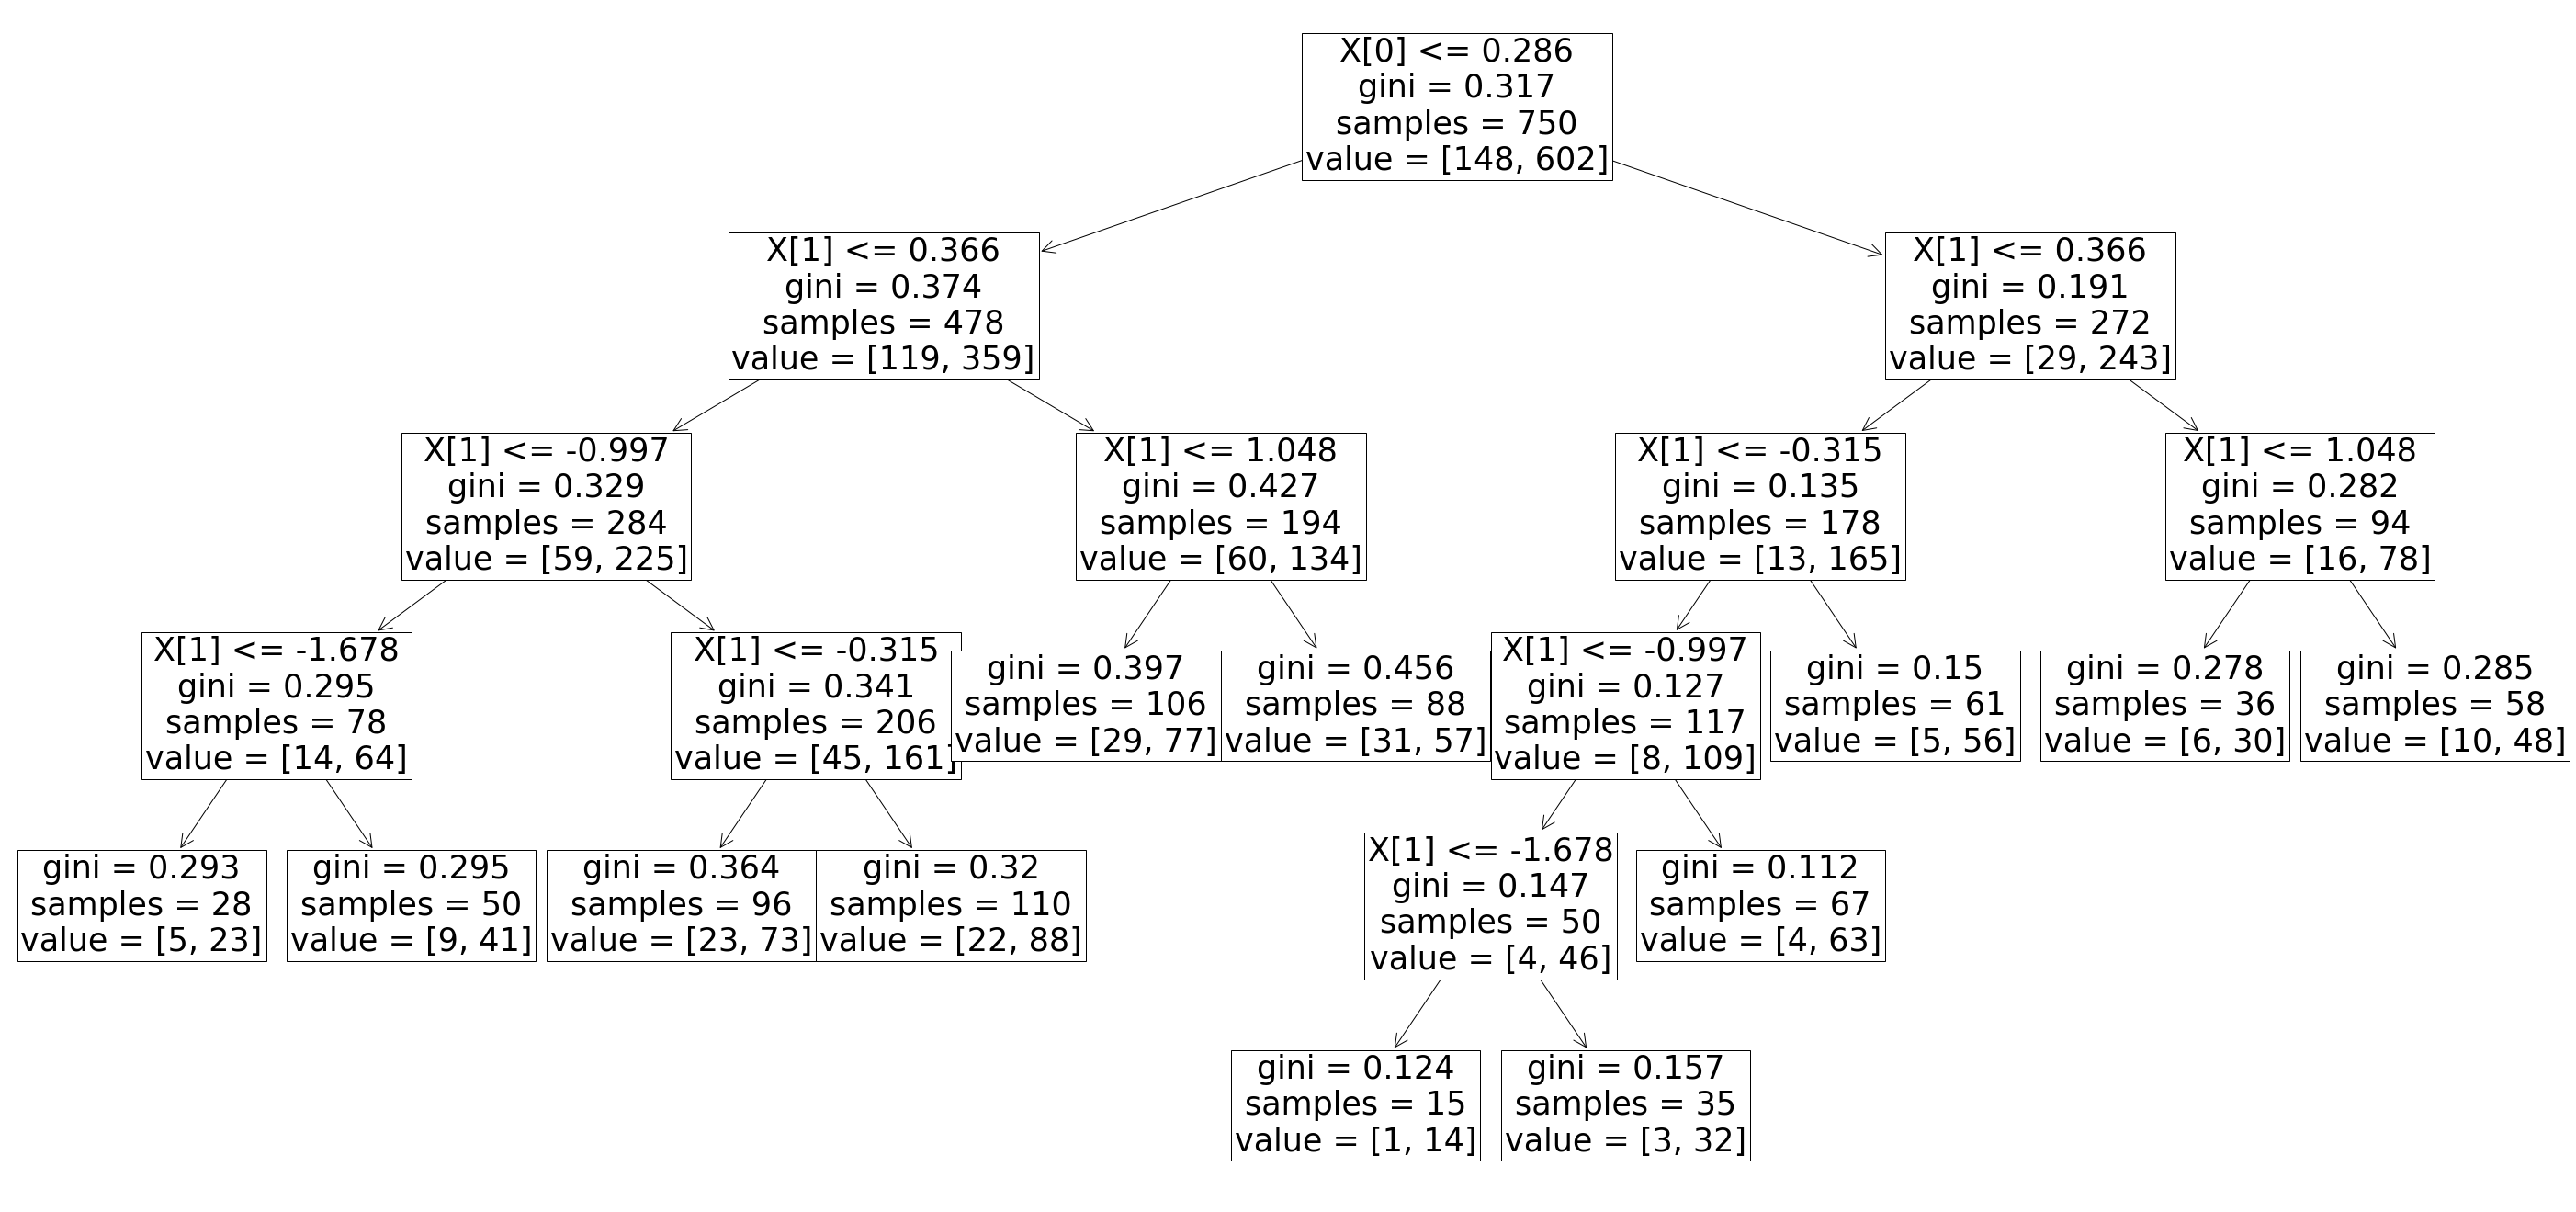

In [220]:
tree_X = stud_perf_ord[['test preparation course', 'parental level of education']]
tree_y = stud_perf_ord['pass']

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
tree_X_train, tree_X_test, tree_y_train,tree_y_test =  train_test_split(tree_X,tree_y,test_size = 0.25, random_state= 0)
sc_X = StandardScaler()
tree_X_train = sc_X.fit_transform(tree_X_train)
tree_X_test = sc_X.transform(tree_X_test)

tree_classifier = DecisionTreeClassifier()
tree_classifier = tree_classifier.fit(tree_X_train,tree_y_train)

y_pred = tree_classifier.predict(tree_X_test)

from sklearn import metrics
print('ACCURACY:', metrics.accuracy_score(tree_y_test,y_pred))

from sklearn import tree
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(tree_classifier,fontsize =35)



Analizując utworzone drzewa decyzyjne można potwierdzić, że prawidłowe odżywianie wśród uczniów ma znaczny wpływ na wyniki na egzaminach, a test przygotowujący do egzaminu ma wpływ unormowany. Zauważamy jednak, iż wykształcenie rodziców nie jest istotnym czynnikiem.



# CLUSTERING

## Przygotowanie danych pod clustering:

In [221]:
stud_perf.head()
stud_perf['parental level of education'].unique()

stud_perf_ord = stud_perf.copy()
for i in range(len(stud_perf_ord)):
    if(stud_perf_ord['parental level of education'].iloc[i] == "bachelor's degree"):
        stud_perf_ord['parental level of education'].iloc[i] = 2
    elif(stud_perf_ord['parental level of education'].iloc[i] == "some college"):
        stud_perf_ord['parental level of education'].iloc[i] = 4
    elif(stud_perf_ord['parental level of education'].iloc[i] == "master's degree"):
        stud_perf_ord['parental level of education'].iloc[i] = 1
    elif(stud_perf_ord['parental level of education'].iloc[i] == "associate's degree"):
        stud_perf_ord['parental level of education'].iloc[i] = 3
    elif(stud_perf_ord['parental level of education'].iloc[i] == "high school"):
        stud_perf_ord['parental level of education'].iloc[i] = 5
    else:
        stud_perf_ord['parental level of education'].iloc[i] = 6
        
for i in range(len(stud_perf_ord)):
    if(stud_perf_ord.lunch.iloc[i] == 'standard'):
        stud_perf_ord.lunch.iloc[i] = 1
    else:
        stud_perf_ord.lunch.iloc[i] = 0

mark_list = []
for index in stud_perf_ord.index:
    if(stud_perf['math score'].iloc[index] > 50 and stud_perf['writing score'].iloc[index]>50 and stud_perf['writing score'].iloc[index]>50):
        mark_list.append(1)
    else:
        mark_list.append(0)
        
stud_perf['pass']=mark_list

for i in range(len(stud_perf_ord)):
    if(stud_perf_ord['test preparation course'].iloc[i] == 'none'):
        stud_perf_ord['test preparation course'].iloc[i] = 0
    else:
        stud_perf_ord['test preparation course'].iloc[i] = 1


C:\Users\przem\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [222]:
stud_perf_ord.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass
0,female,group B,2,1,0,72,72,74,1
1,female,group C,4,1,1,69,90,88,1
2,female,group B,1,1,0,90,95,93,1
3,male,group A,3,0,0,47,57,44,0
4,male,group C,4,1,0,76,78,75,1


In [223]:
stud_perf_ord.head()
dummy_s_p = pd.get_dummies(stud_perf_ord)
dummy_s_p

,math score,reading score,writing score,pass,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,...,parental level of education_1,parental level of education_2,parental level of education_3,parental level of education_4,parental level of education_5,parental level of education_6,lunch_0,lunch_1,test preparation course_0,test preparation course_1
0,72,72,74,1,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
1,69,90,88,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
2,90,95,93,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
3,47,57,44,0,0,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,76,78,75,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
996,62,55,55,1,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
997,59,71,65,1,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
998,68,78,77,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1


False

# CLUSTEROWANIE WSZYSTKICH DANYCH - PCA

In [227]:
def PCA_stud_perf(clusters, data):
    kmeans = KMeans(n_clusters = clusters) 
    kmeans.fit(data) 

    pca = PCA(clusters) 
    pca.fit(data) 
    pca_data = pd.DataFrame(pca.transform(data)) 

    colors = list(zip(*sorted(( 
                        tuple(mcolors.rgb_to_hsv( 
                              mcolors.to_rgba(color)[:3])), name) 
                         for name, color in dict( 
                                mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                          ).items())))[1] 

    skips = math.floor(len(colors[1 : -1])/clusters) 
    cluster_colors = colors[7 : -7 : skips]    
    fig = plt.figure() 
    ax = fig.add_subplot(111, projection = '3d') 
    ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
               c = list(map(lambda label : cluster_colors[label], 
                                                kmeans.labels_))) 

    str_labels = list(map(lambda label:'% s' % label, kmeans.labels_)) 

    plt.show() 

## dla 3 clusterów:

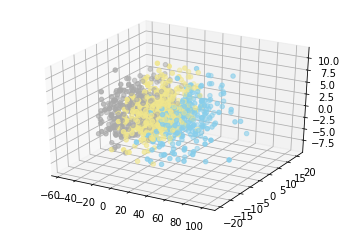

In [228]:
PCA_stud_perf(3,dummy_s_p)

## dla 4 clusterów: 

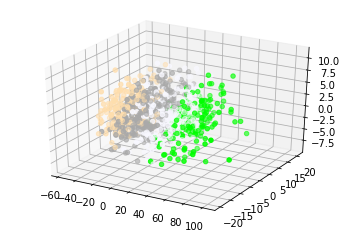

In [230]:
PCA_stud_perf(4,dummy_s_p)

## dla 8 clusterów:

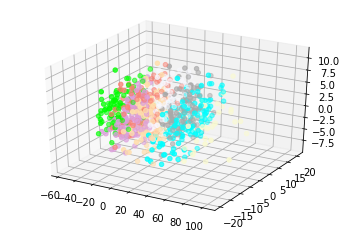

In [232]:
PCA_stud_perf(8,dummy_s_p)

Powyższe clustery powstały za pomocą one-hot-encodingu wejściowych danych jakościowych a następnie zastosowania algorytmu PCA. Otrzymaliśmy 3 kolumny reprezentacyjne dla całych danych, jednak nieinterpretowalne ze względu na szczególne cechy danych. Analizując powstałe clustery stwierdzamy, że dla 3 i 4 żądanych zmiennych formują one podział w sposób prawidłowy, natomiast dla 8 wyraźnie podział ten zanika.

# CLUSTEROWANIE PO 3 ZMIENNYCH

## CLUSTERY DLA: LUNCH, OCENA Z MATEMATYKI, OCENA Z PISEMNEGO

In [233]:
stud_perf_lunch = stud_perf_ord[['lunch', 'math score', 'writing score']]

plt.tight_layout()

def cluster_lunch_stud_perf(clusters):
    kmeans = KMeans(n_clusters = clusters) 
    kmeans.fit(stud_perf_lunch) 


    colors = list(zip(*sorted(( 
                        tuple(mcolors.rgb_to_hsv( 
                              mcolors.to_rgba(color)[:3])), name) 
                         for name, color in dict( 
                                mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                          ).items())))[1] 



    skips = math.floor(len(colors[1 : -1])/clusters) 
    cluster_colors = colors[2 : -2 : skips]    
    fig = plt.figure() 
    ax = fig.add_subplot(111, projection = '3d') 
    ax.scatter(stud_perf_lunch.lunch, stud_perf_lunch['math score'], stud_perf_lunch['writing score'],  
               c = list(map(lambda label : cluster_colors[label], 
                                                kmeans.labels_))) 

    ax.set_xlabel('Lunch')
    ax.set_ylabel('Math score')
    ax.set_zlabel('Writing score')
    plt.tight_layout()
    plt.show() 

<Figure size 432x288 with 0 Axes>

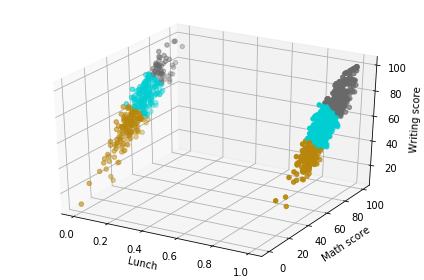

In [234]:
cluster_lunch_stud_perf(3)

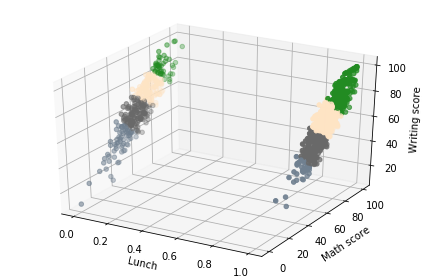

In [235]:
cluster_lunch_stud_perf(4)

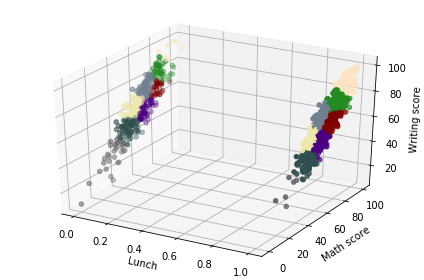

In [236]:
cluster_lunch_stud_perf(8)

Dzięki powyższym ilustracjom możemy definitywnie potwierdzić wpływ jakości odżywiania na ogół wyników, jako że dane formują prostą nieprzechyloną w żadną stronę względem wyników. Szczególnie zależność objawia się w potężnej przewadze dobrych wyników dla osób spożywających lepsze posiłki. Koncentracja gorszych wyników jest także słabsza dla tej grupy.

## CLUSTERY DLA: WYKSZTAŁCENIE RODZICÓW, OCENA Z MATEMATYKI, OCENA Z PISANIA

In [237]:
stud_perf_par_edu = stud_perf_ord[['parental level of education', 'math score', 'writing score']]

plt.tight_layout()

def cluster_par_edu_stud_perf(clusters):
    kmeans = KMeans(n_clusters = clusters) 
    kmeans.fit(stud_perf_par_edu) 


    colors = list(zip(*sorted(( 
                        tuple(mcolors.rgb_to_hsv( 
                              mcolors.to_rgba(color)[:3])), name) 
                         for name, color in dict( 
                                mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                          ).items())))[1] 



    skips = math.floor(len(colors[1 : -1])/clusters) 
    cluster_colors = colors[2 : -2 : skips]    
    fig = plt.figure() 
    ax = fig.add_subplot(111, projection = '3d') 
    ax.scatter(stud_perf_par_edu['parental level of education'], stud_perf_par_edu['math score'], stud_perf_par_edu['writing score'],  
               c = list(map(lambda label : cluster_colors[label], kmeans.labels_)))

    ax.set_xlabel('Parental level of education')
    ax.set_ylabel('Math score')
    ax.set_zlabel('Writing score')
    plt.tight_layout()
    plt.show() 

<Figure size 432x288 with 0 Axes>

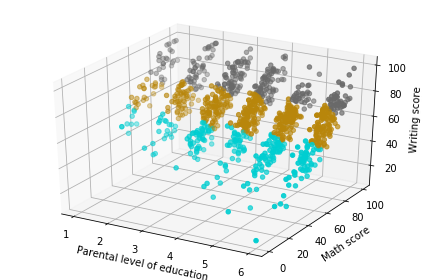

In [238]:
cluster_par_edu_stud_perf(3)

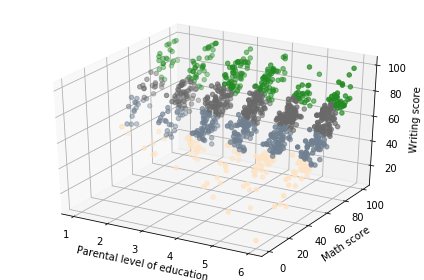

In [239]:
cluster_par_edu_stud_perf(4)

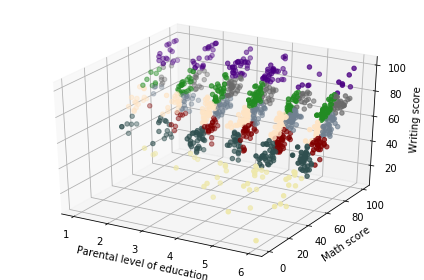

In [240]:
cluster_par_edu_stud_perf(8)

Liczby przy parental_level_of_education to poszczególne poziomy wykształcenia. Analizując clustery dla poziomu wykształcenia rodziców można zanotować, że poziom wykształcenia rodziców ma niewielki wpływ na wyniki egzaminów. Dla dzieci, których rodzice skończyli edukacje na szkole wyższej (5) można zauważyć brak i niewielką ilość wyników wysokich z egzaminów. Zagęszczenie jest proporcjonalnie podobne w każdej z frakcji edukacji, a nawet wyższą gęstość dobrychw średnich wartościach wykształcenia

## CLUSTERY DLA: TEST PRZYGOTOWAWCZY, OCENA Z MATEMATYKI, OCENA Z PISANIA

In [241]:
stud_perf_test_prep_edu = stud_perf_ord[['test preparation course', 'math score', 'writing score']]

from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
from matplotlib import colors as mcolors 
import math 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

plt.tight_layout()

def cluster_test_prep_stud_perf(clusters):
    kmeans = KMeans(n_clusters = clusters) 
    kmeans.fit(stud_perf_par_edu) 


    colors = list(zip(*sorted(( 
                        tuple(mcolors.rgb_to_hsv( 
                              mcolors.to_rgba(color)[:3])), name) 
                         for name, color in dict( 
                                mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                          ).items())))[1] 



    skips = math.floor(len(colors[1 : -1])/clusters) 
    cluster_colors = colors[2 : -2 : skips]    
    fig = plt.figure() 
    ax = fig.add_subplot(111, projection = '3d') 
    ax.scatter(stud_perf_test_prep_edu['test preparation course'], stud_perf_test_prep_edu['math score'],stud_perf_test_prep_edu['writing score'],  
               c = list(map(lambda label : cluster_colors[label], kmeans.labels_)))

    ax.set_xlabel('Preparation test')
    ax.set_ylabel('Math score')
    ax.set_zlabel('Writing score')
    plt.tight_layout()
    plt.show() 

<Figure size 432x288 with 0 Axes>

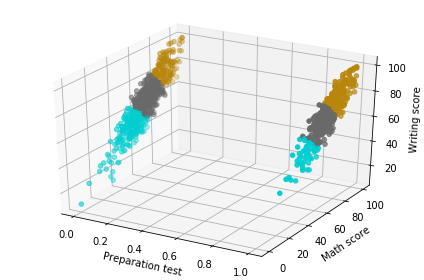

In [242]:
cluster_test_prep_stud_perf(3)

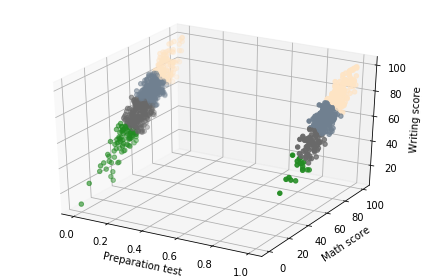

In [243]:
cluster_test_prep_stud_perf(4)

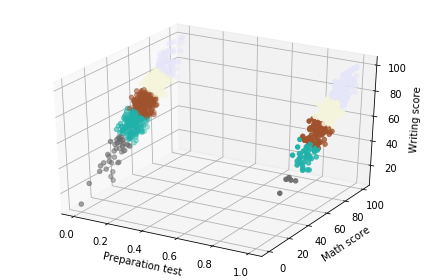

In [244]:
cluster_test_prep_stud_perf(5)

Finalnie - przeanalizujmy wyniki clusterowania dla testu przygotowawczego. Ponownie obserwujemy silniejsze zagęszczenie wyników dobrych dla odbytego testu. Jest to wynik spodziewany. Co jednak szokuje, różnica jest mniejsza niż w clusterach dla zmiennej "lunch", co sugeruje, iż wpływ posiłków jest większy niż omawiany test.

# ISOLATION FOREST 

### Na koniec przeprowadzimy badanie outlierów za pomocą dwukrotnie iterowanego Isolation Forest dla zmiennej lunch.


In [245]:
df = stud_perf_ord[['lunch', 'math score', 'writing score']]

model=IsolationForest(n_estimators=100, max_samples='auto', 
                      max_features=1.0)
model.fit(df)

df['anomaly']=model.predict(df)


anomalies = df.loc[df['anomaly']==-1]
anomalies.drop(columns = 'anomaly', inplace = True)
anomalies.reset_index(inplace = True)


model=IsolationForest(n_estimators=100, max_samples='auto', 
                      max_features=1.0)
model.fit(anomalies)
anomalies['anomaly']=model.predict(anomalies)
anomalies.head(20)
anomalies2=anomalies.loc[anomalies['anomaly']==-1]
anomalies2.drop(columns = 'anomaly', inplace = True)
anomalies2.reset_index(inplace = True)
anomalies2

C:\Users\przem\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\przem\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\przem\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

,level_0,index,lunch,math score,writing score
0,0,1,1,69,88
1,1,2,1,90,93
2,2,3,0,47,44
3,3,6,1,88,92
4,4,7,0,40,39
...,...,...,...,...,...
113,283,989,0,67,83
114,284,990,0,86,75
115,285,992,0,55,76
116,286,995,1,88,95


In [246]:
outlier_data = anomalies2

plt.tight_layout()
plt.savefig("sample.jpg", dpi=300)
def cluster_iso_stud_perf(clusters):
    kmeans = KMeans(n_clusters = clusters) 
    kmeans.fit(outlier_data) 


    colors = list(zip(*sorted(( 
                        tuple(mcolors.rgb_to_hsv( 
                              mcolors.to_rgba(color)[:3])), name) 
                         for name, color in dict( 
                                mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                          ).items())))[1] 



    skips = math.floor(len(colors[1 : -1])/clusters) 
    cluster_colors = colors[2 : -2 : skips]    
    fig = plt.figure() 
    ax = fig.add_subplot(111, projection = '3d') 
    ax.scatter(outlier_data['lunch'], outlier_data['math score'], outlier_data['writing score'],  
               c = list(map(lambda label : cluster_colors[label], kmeans.labels_)))

    ax.set_xlabel('lunch')
    ax.set_ylabel('Math score')
    ax.set_zlabel('Writing score')
    plt.savefig("sample.jpg", dpi=300)
    plt.tight_layout()
    plt.show() 

<Figure size 432x288 with 0 Axes>

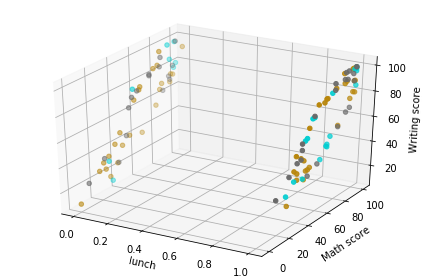

In [247]:
cluster_iso_stud_perf(3)

Wykryto w przyblizeniu 119 outlierów. Jak można było się spodziewać, główne anomalie dla danych są w rogach wykresu, jako że ekstremalne wyniki nie należą do najczęstszych. Widać także, że osoby z lunchem tworzą cluster przesunięty o około 20% w górę dla obu egzaminów. Dowodzi to tezy, że lunch ma krytyczny wpływ na wyniki.